In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('hr_employee_churn_data.csv')

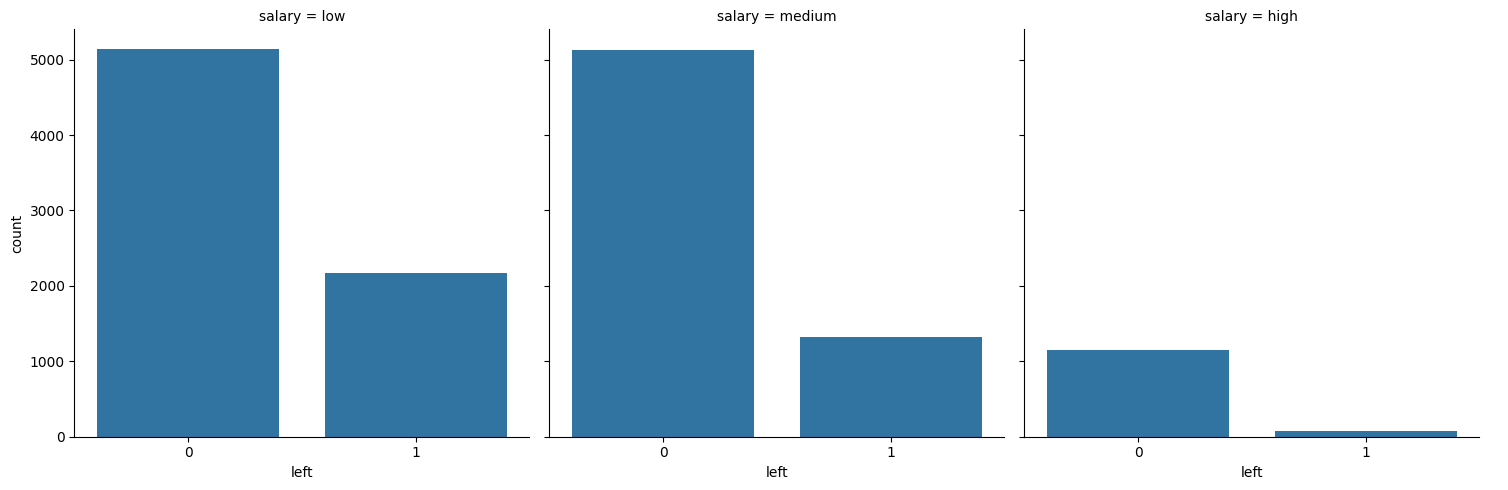

In [8]:
sns.catplot(x=df['left'],col=df['salary'],kind='count',data=df)

In [9]:
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [10]:
df.columns

Index(['empid', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'left'],
      dtype='object')

In [11]:
df.shape

(14999, 10)

In [12]:
df.drop('empid',axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14997 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   salary                 14999 non-null  object 
 8   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


In [14]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [15]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['salary']=le.fit_transform(df['salary'])

In [17]:
df['salary'].value_counts()

salary
1    7316
2    6446
0    1237
Name: count, dtype: int64

In [18]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,1,1
1,0.80,0.86,5,262,6,0,0,2,1
2,0.11,0.88,7,272,4,0,0,2,1
3,0.72,0.87,5,223,5,0,0,1,1
4,0.37,0.52,2,159,3,0,0,1,1


In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

<Axes: xlabel='satisfaction_level', ylabel='Count'>

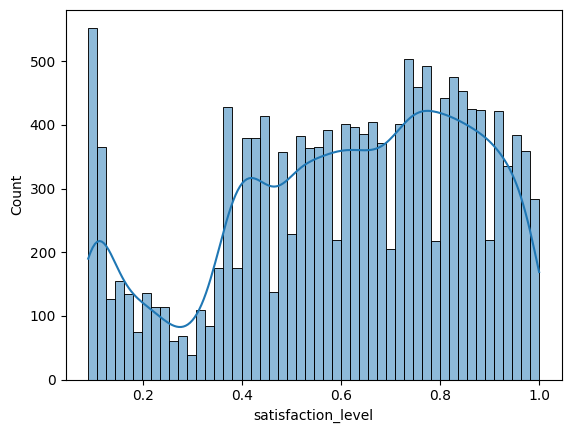

In [20]:
sns.histplot(df['satisfaction_level'],kde=True,bins=50)

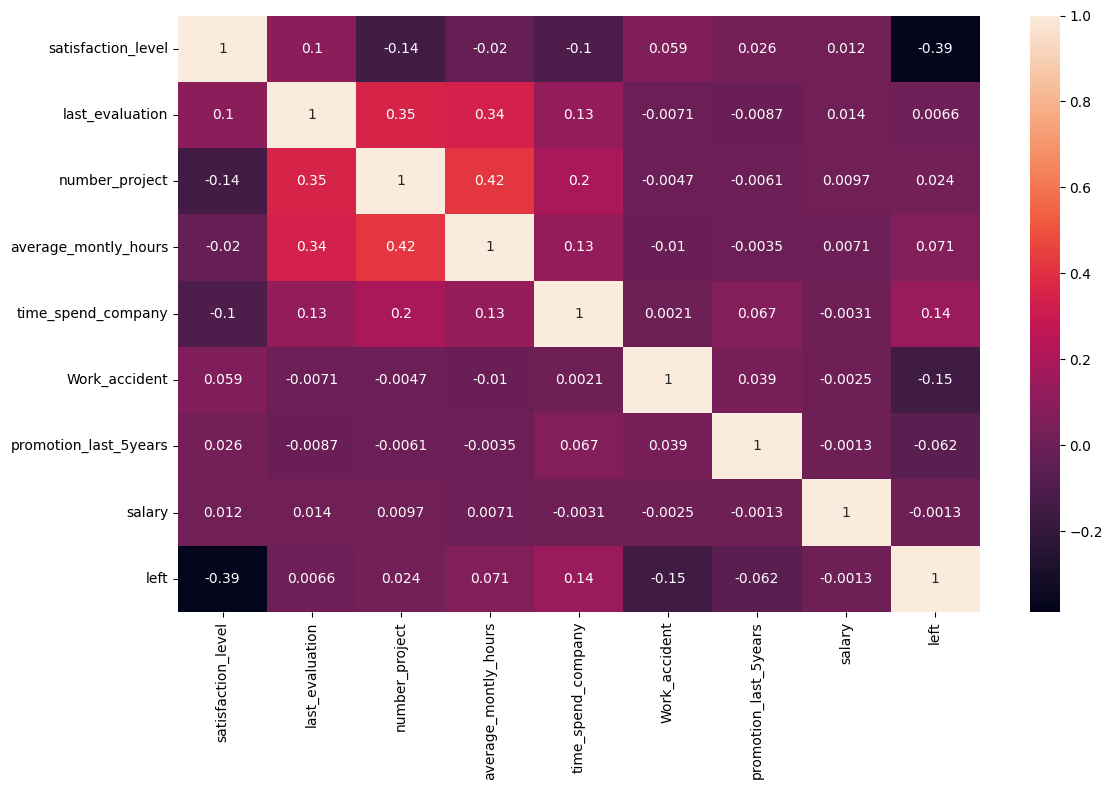

In [21]:
#now we check correlation between different features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()
plt.show()

<Axes: xlabel='left', ylabel='count'>

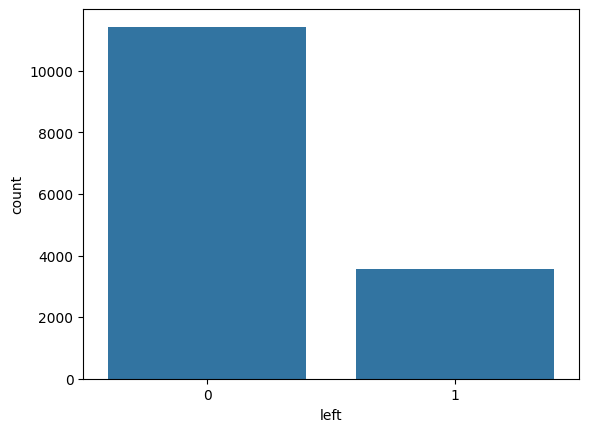

In [22]:
sns.countplot(x='left',data=df)
#in traning data we have 3571 employees left the company and 11428 employees stayed in the company it unbalanced data

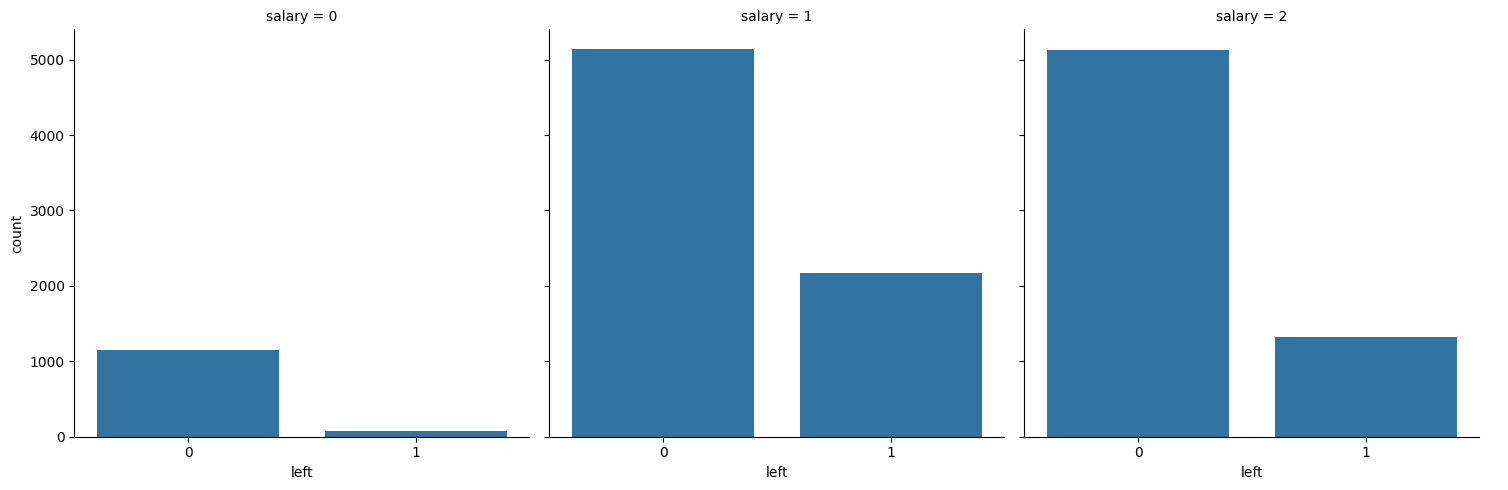

In [23]:
sns.catplot(x=df['left'],col=df['salary'],kind='count',data=df)
#employees with low salary are leaving the company more

<Axes: xlabel='left', ylabel='satisfaction_level'>

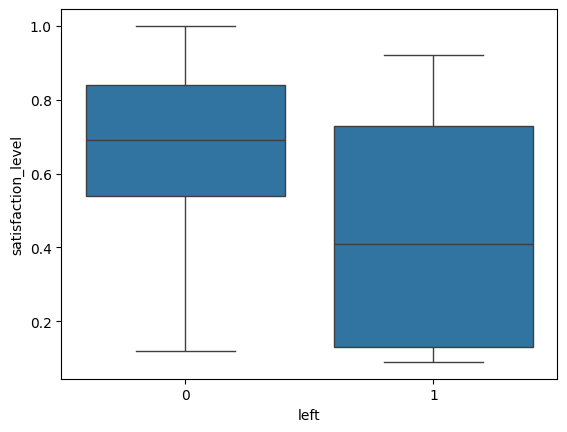

In [24]:
sns.boxplot(x=df['left'],y=df['satisfaction_level'])

#employees with low satisfaction level are leaving the company more

<Axes: xlabel='number_project', ylabel='average_montly_hours'>

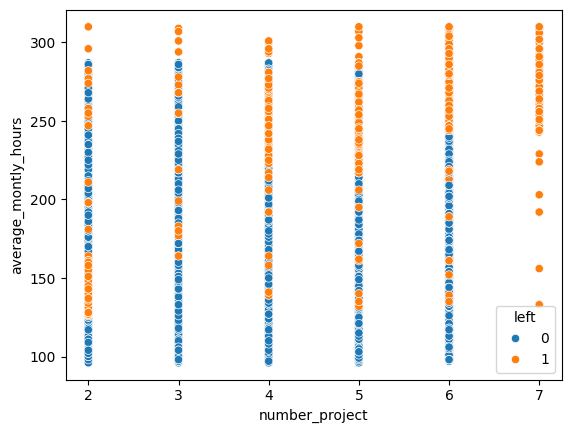

In [25]:
sns.scatterplot(x=df['number_project'],y=df['average_montly_hours'],hue=df['left'])

<Axes: xlabel='left', ylabel='average_montly_hours'>

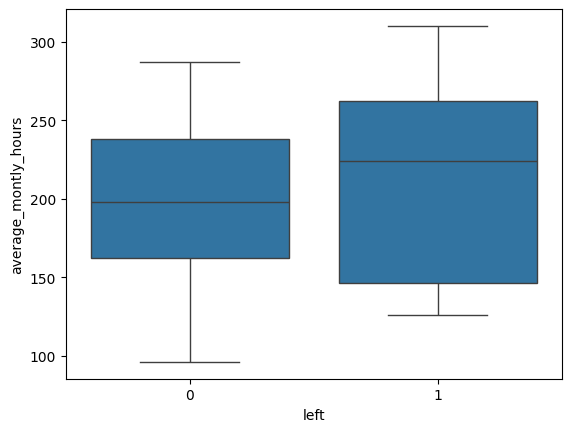

In [26]:
sns.boxplot(x='left',y='average_montly_hours',data=df)
#employees with more average monthly hours are leaving the company
#employees with less number of monthly hours are leaving the company

<Axes: xlabel='left', ylabel='number_project'>

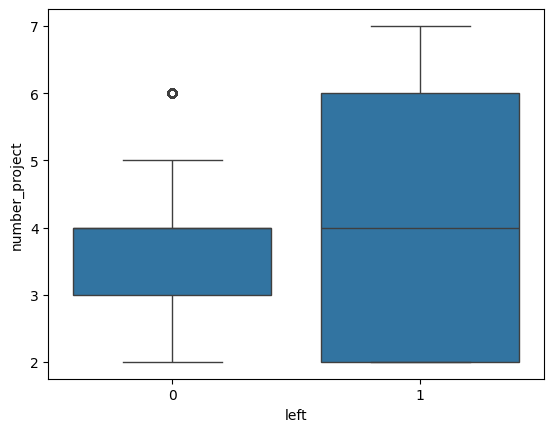

In [27]:
sns.boxplot(x='left',y='number_project',data=df)
#employees with more number of projects are leaving the company

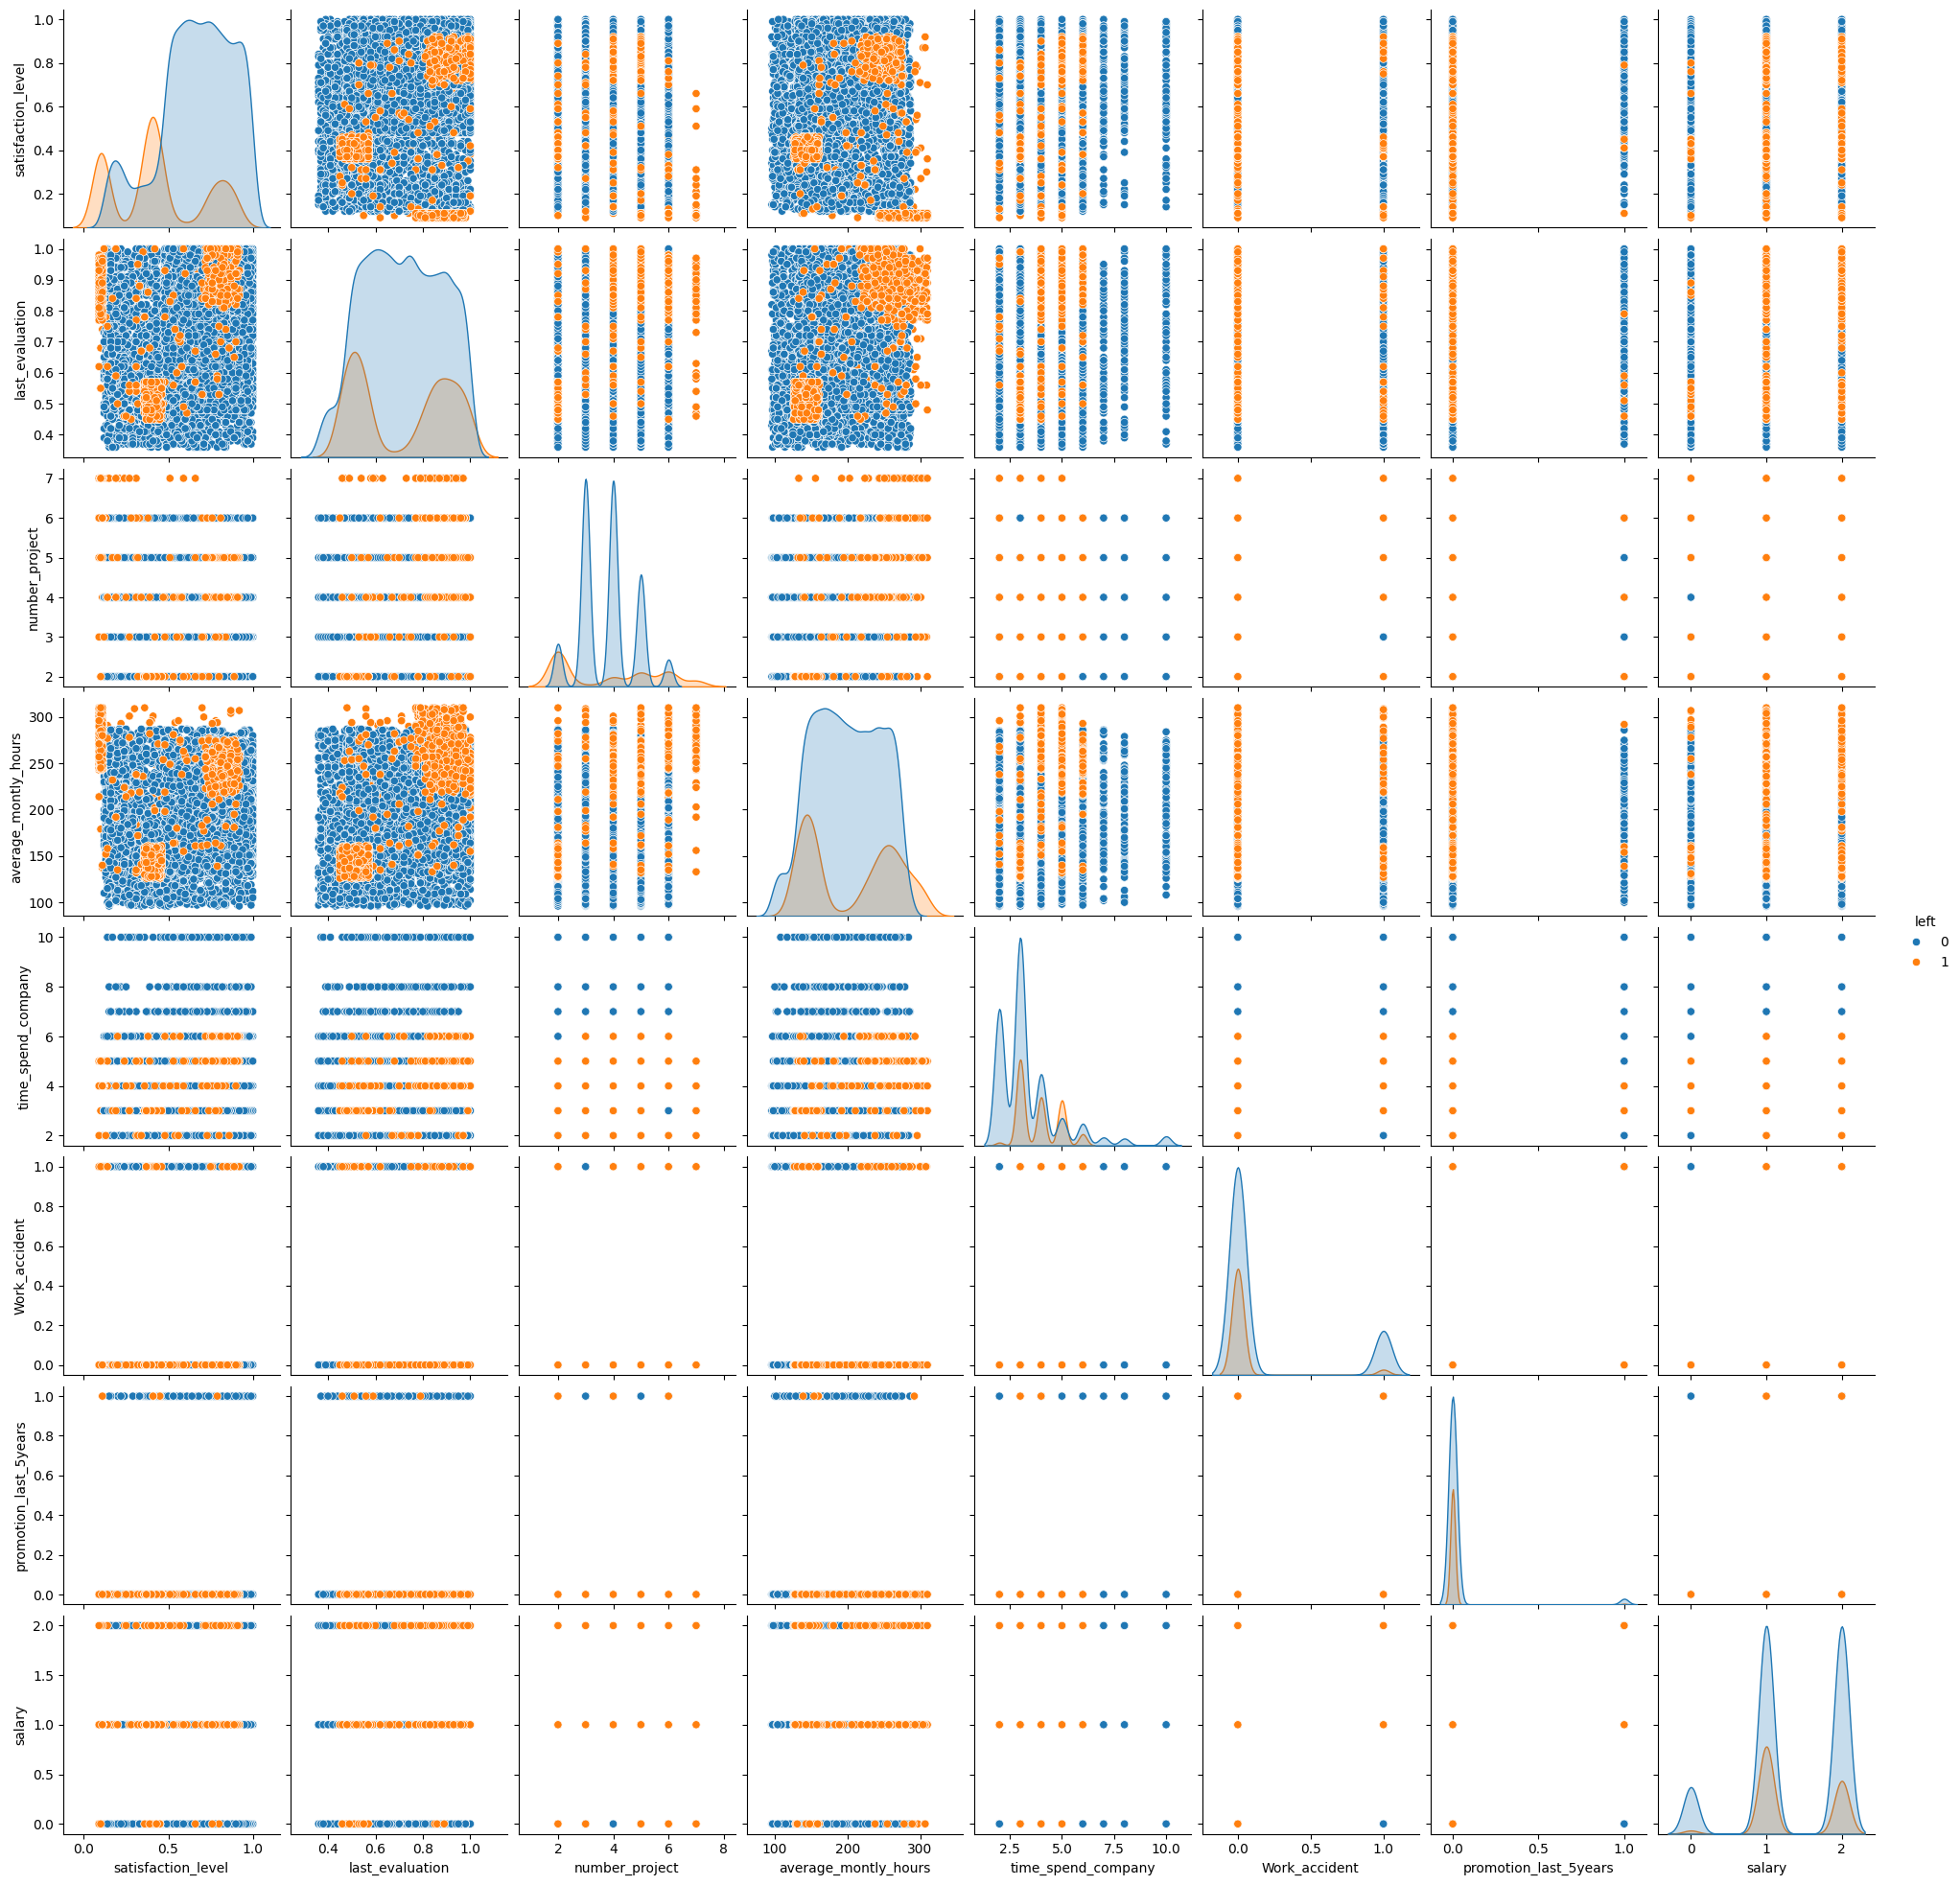

In [28]:
sns.pairplot(df,hue='left')

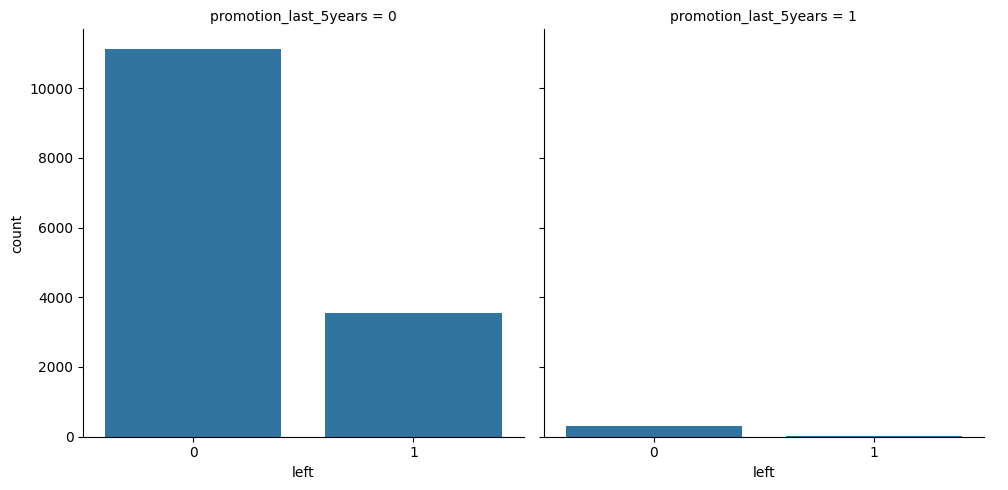

In [40]:
sns.catplot(x=df['left'],col=df['promotion_last_5years'],kind='count')


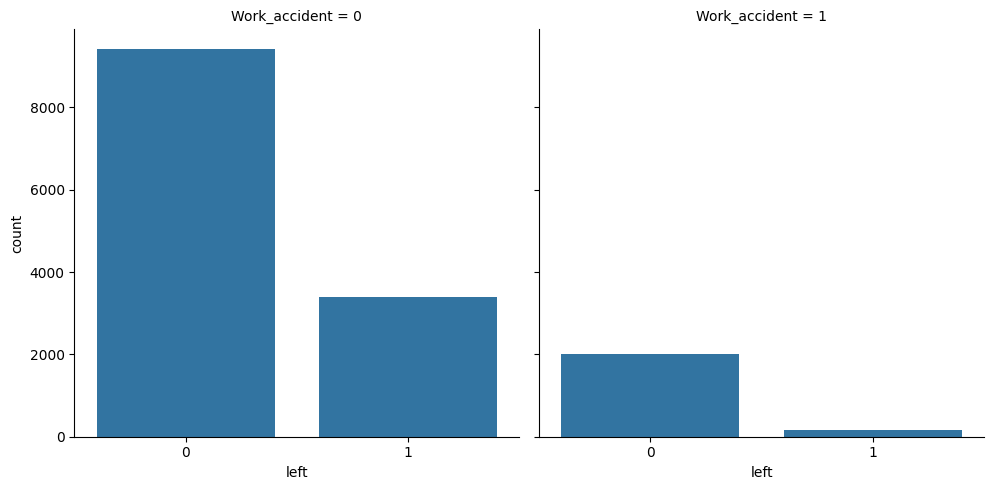

In [41]:
sns.catplot(x=df['left'],col=df['Work_accident'],kind='count')

FEATURE ENGENEERING

In [42]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [43]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,1.347290,0.238083
std,0.248618,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.625819,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,1.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,1.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,2.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,2.000000,1.000000


In [44]:
df['satisfaction_level'].fillna(df['satisfaction_level'].mean(),inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27228\1078361875.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['satisfaction_level'].fillna(df['satisfaction_level'].mean(),inplace=True)


In [45]:
#next is handling the categorical columns
#we had done label encoding on salary column in the begining


In [46]:
x=df.drop('left',axis=1)
y=df['left']

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
x_train.shape

(11999, 8)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV #for hyperparameter tuning

In [50]:
#model parameters

#create param
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [55]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [ ]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(x,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })
    

In [ ]:
scores
#so we can see that xgboost is giving us better accuracy with 0.990 accuracy

[{'model': 'RandomForestClassifier',
  'best_score': np.float64(0.9201959319773257),
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': np.float64(0.9905994664888296),
  'best_params': {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200}}]

In [61]:
model=XGBClassifier(learning_rate= 0.1, max_depth=20, n_estimators=200)
model.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [62]:
model.score(x_test,y_test)

0.9876666666666667

In [68]:
y_pred=model.predict(x_test)

In [64]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,1,1
1,0.80,0.86,5,262,6,0,0,2,1
2,0.11,0.88,7,272,4,0,0,2,1
3,0.72,0.87,5,223,5,0,0,1,1
4,0.37,0.52,2,159,3,0,0,1,1


In [65]:
model.predict([[0.38,0.53,2,157,0,0,3,1]])

array([1])

In [70]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred),"\n")
print(confusion_matrix(y_test,y_pred),"\n")
print("Accuracy:",model.score(x_test,y_test),"\n")

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000
 

[[2284   10]
 [  27  679]] 

Accuracy: 0.9876666666666667 



<Axes: >

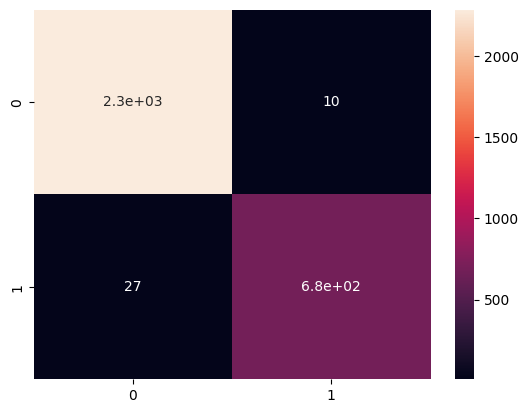

In [71]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)